# Redes neuronales no supervidadas

## Introduccion

Las redes neuronales artificiales con aprendizaje no supervisado se han aplicado con éxito a problemas de reconocimiento de patrones y detección de señales. Estas redes construyen clases o categorías a partir de los datos de entrada utilizando correlaciones o medidas de similitud e intentan identificar particiones "óptimas" en el conjunto de datos de entrada.

En una red neuronal competitiva, las unidades de salida compiten entre sí para activarse; solo se activa la que presenta el mayor potencial sináptico. La idea del aprendizaje competitivo ya se esboza en los primeros trabajos de von der Malsburg (1973) sobre la autoorganización de las células nerviosas en la corteza cerebral. En 1975, Fukushima propuso el cognitrón, una red competitiva multicapa autoorganizada. Willshaw y von der Malsburg (1976) trabajaron en la formación de conexiones neuronales por autoorganización, y Grossberg (1972, 1976) en la clasificación adaptativa de patrones.

## Reglas del aprendizaje competitivo

Rumelhart y Zisper (1985) especificaron los tres elementos básicos de una regla de aprendizaje competitivo:

- Un conjunto de neuronas (unidades de proceso) que se activan o no en respuesta a un conjunto de patrones de entrada (estímulos) y que difieren en los valores de un conjunto de pesos sinápticos específicos de cada neurona.
- Un límite impuesto a la "fuerza" de cada neurona.
- Un mecanismo que permite a las neuronas competir para responder a un subconjunto de entradas de tal manera que solo se activa una neurona por grupo.

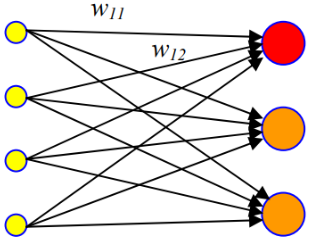

El aprendizaje competitivo se puede implementar mediante una red neuronal de dos capas (J-K). Las capas de entrada y salida están completamente conectadas. La capa de salida se denomina capa de competencia, y en ella se utilizan conexiones laterales para realizar la inhibición lateral.

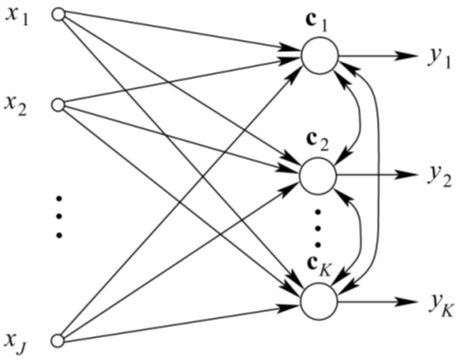

El aprendizaje competitivo generalmente se deriva de la minimización del error cuadrático medio (EMM) funcional (Tsypkin, 1973).

$$min E_{ck} = \sum_{p=1}^{N} \sum_{k=1}^{K} \mu_{kp} \lvert x_{p} - c_{k} \rvert^{2}$$

donde $\mu_{kp}$ es la coneccion de la neurona $k$ con la observación $x_{p}$ y $c_{k}$ es el centro de la neuorna $k$. Cuando $c_{k}$ es  la mas cercana (ganadora) a $x_{p}$ en la metrica euclidiana entonces $\mu _{kp} = 1$, de otra manera $\mu_{kp} = 0.$

Sea $x_{p}$ el patrón que introducimos en la red en la iteración $p$. El objetivo es modificar los vectores de pesos sináptico para minimizar la expresión del error que depende de dicho patrón. 

$$min E_{p} = \sum_{k=1}^{k} \mu_{kp}\lvert x_{p} - c_{k} \rvert^{2}$$

Solo se actualiza el prototipo mas cercano y se actualiza su peso.

El peso de la neurona ganadora se actualiza según la siguiente regla de aprendizaje:
$$c_{ganadora}(t+1) = c_{ganadora}(t) - \alpha \frac{\partial E_{p}(t)}{\partial c_{ganadora}(t)}$$

$$c_{i}(t+1) = c_{i}(t)$$

para $i \neq ganadora$


(1) Supongamos el caso de solo una observación, calculando la derivada parcial de $E_{p}$: 

$$E_{p} = \sum_{k=1}^{k} \mu_{kp}\lvert x_{p} - c_{k} \rvert^{2} $$
$$\frac{\partial E_{p}(t)}{\partial c_{ganadora}(t)} = -2\mu_{kp}[x_{t}-c_{ganadora}(t)]$$

$$c_{ganadora}(t+1) = c_{ganadora}(t) - \alpha \frac{\partial E_{p}(t)}{\partial c_{ganadora}(t)}$$
$$c_{ganadora}(t+1) = c_{ganadora}(t) - \alpha (-2\mu_{kp}[x_{t}-c_{ganadora}(t)])$$
$$c_{ganadora}(t+1) = c_{ganadora}(t) + \eta (t)[x_{t}-c_{ganadora}(t)]$$

$$\eta(t) = \eta_{0}(1- \frac{t}{T})$$
$$c_{i}(t+1) = c_{i}(t)$$

para $i \neq ganadora$

Se supone la tasa de aprendizaje $$\eta(t) = \eta_{0}(1- \frac{t}{T})$$, se puede utilizar otro tipo de tasa de aprendizaje. 

(2)Suponemo ahora que no nos enfocamos en una sola observacion, sino que en toda las observaciones que van a entrar  la red y por las cuales las neuornas van a competir, pero añadirle el promedio, es decir: 

$$min E_{ck} = \frac{1}{N}\sum_{k=1}^{K} \sum_{x_{i} \in C_{k}} \mu_{kp} \lvert x_{n} - c_{k} \rvert^{2}$$

como solo va a ganar una $c_{k}$ su valor de $\mu_{kp}= 1$ y en otro caso sera cero, entonces obtenemos solamente al derivar 

$$\frac{\partial E}{\partial c_{k}} = \frac{1}{N}\sum_{i=1}^{N_{k}}2(x_{i}-c_{k})(-1) = 0$$

Se iguala a cero por que necesito saber cual es ese punto critico, despejando 
$$\frac{1}{N}\sum_{i=1}^{N_{k}}2(x_{i}-c_{k})(-1) = 0$$
$$\sum_{i=1}^{N_{k}}(x_{i}-c_{k}) = 0$$
$$\sum_{i=1}^{N_{k}}x_{i}- \sum_{i=1}^{N_{k}}c_{k} = 0$$

Por resultados de propiedades de la sumatoria se tiene 
$$\sum_{i=1}^{N_{k}}x_{i}- N_{k}c_{k} = 0$$
$$c_{k} = \frac{1}{N_{k}}\sum_{i=1}^{N_{k}}x_{i}$$

Esta ultima formula es la formula de Kmeans, donde $c_{k}$ es el centroide que es igual al promedio de los elementos que ganan. Esto significa que el Kmeans es una red neuronal no supervisada con aprendizaje competitivo donde su centroide es la neurona mas competitiva. Este es el algoritmo de Kmeans. 

$\textbf{Obs.}$ (1) es aprendizaje competitivo puro y (2) es aprendizaje competitivo con promedio es el kmeans.

Podemos ser un poco menos estrictos, quitar el promedio y decir que todas las neuronas se actualicen pero la que esta mas cerca se actualice mas y las que estan mas lejos se actualicen menos en funcion del ranking. Es decir, una actualización por ranking.

$$min E_{ck} = \sum_{p=1}^{N} \sum_{k=1}^{K} \mu_{kp} \lvert x_{p} - c_{k} \rvert^{2}$$

con la siguiente regla 
$$c_{k}(t+1) = c_{k}(t) + \eta (t)h_{k,w}[x_{t}-c_{k}(t)]$$
donde $h_{k,w}$ es el ranking que es decreciente (de aqui surge otro algoritmo llamado gas neuronal, es otra tecnica de clustering que se utiliza cuando suavisas la competencia)

Notas de la clase: 
- En la practica, las variables se tienen que elegir mediante intuición y no se tiene que poner a competir las variables (Esto es seleccionar variables sin entender por que se estan seleccionado)

## Ejercicio de la clase: retiro temprano con Keras

In [46]:
#librerias tipicas 
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Configurar pandas para mostrar 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

#librerias relacionadas con la red neuronal
from keras.models import Sequential
from keras.layers import Dense 


In [47]:
BASE_DIR = Path().resolve()

while not (BASE_DIR / "Clases").exists():
    BASE_DIR = BASE_DIR.parent

In [48]:
# Importamos el documento
ERDB = pd.read_excel(BASE_DIR / "Clases" /"Clase2"/"EarlyRetirementPrediction.csv.xlsx")
ERDB.head()

,ClienteID,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return
0,1,1,1,1,3,0,18000,0,4,3.44,24066.17,699,7.72
1,2,0,1,0,3,0,32000,0,1,5.02,42063.17,639,5.41
2,3,0,1,1,4,0,20000,0,2,5.36,30100.50,610,7.96
3,4,0,0,1,4,1,35000,1,1,3.84,24066.17,649,7.72
4,5,0,0,1,3,0,27000,0,1,4.95,19439.00,638,8.02


In [49]:
#definimos el conjunto de entramiento y el conjunto de prueba 
train, test = train_test_split(ERDB, test_size=0.2, random_state=42)

In [50]:
# train_xtrain = [["Gender", ]]